In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
from nltk.corpus import stopwords
nltk.download('stopwords')
from CleanData import clean_comment, get_bag_of_words
import datetime

[nltk_data] Downloading package stopwords to /home/zchao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## We can find 50 ID's in the list MediaTwitterID which also appeared in the MediaBiasChart. From the MediaBiasChart we have a scaled left/right ideology score.

In [3]:
tweets_df = pd.read_csv('news_filtered.csv')

mediaList = [['thinkprogress', -20], ['MSNBC', -20],['thenation',-17],['thedailybeast',-16],['CNN',-15],
       ['MotherJones',-15],['cnsnews',26],['foxnewsradio',24],['FDRLST',23],['BreitbartNews',20],
       ['DailyCaller',20],['theblaze',16],['FoxNews',15],['BBC',-2],['businessinsider',-1],['CBSNews',-2],
       ['TheEconomist',-3], ['thehill',0],['WSJ',2],['ABC',-1],['AP',-1],['TheAtlantic',-7],['axios',-6],
       ['BBC',-3],['BuzzFeed',-8],['DailySignal',25],['newrepublic',-12],['ForeignPolicy',-2],['TheIJR',7],
       ['NRO',15],['NPR',-3],['nypost',4],['nytimes',-4],['NewYorker',-8],['newsmax',13],['Newsweek',-3],
       ['OANN',14],['politico',-5],['qz',-4],['reason',3],['Reuters',-1],['Slate',-19],['TPM',-6],
       ['VanityFair',-18],['voxdotcom',-10],['dcexaminer',12],['FreeBeacon',18],['washingtonpost',-4],
       ['WashTimes',13],['TheWeek',-9]]

media_df = pd.DataFrame(mediaList, columns =['MediaTwitterAcc', 'LeftRightCoordinate'])
k = 15
all_media = media_df['MediaTwitterAcc'].tolist()
left_media = media_df.loc[media_df['LeftRightCoordinate']<=-k]
left_media = left_media['MediaTwitterAcc'].tolist()
right_media = media_df.loc[media_df['LeftRightCoordinate']>=k]
right_media = right_media['MediaTwitterAcc'].tolist()
neutral_media = media_df.loc[(media_df['LeftRightCoordinate']>=-6) \
                                & (media_df['LeftRightCoordinate']<=6)]
neutral_media = neutral_media['MediaTwitterAcc'].tolist()
len(left_media), len(right_media), len(neutral_media)

(8, 10, 21)

## Number of Tweets: Daily plot and Monthly plot

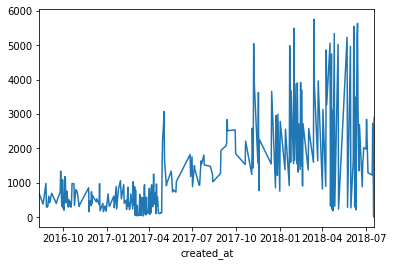

In [3]:
# 357363 Tweets in total
#  32200 from 2016.1.1 to 2016.12.31
# 138590 from 2017.1.1 to 2017.12.31
# 186573 from 2018.1.1 to 2018.12.31

tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
tweets_df.groupby(tweets_df['created_at'].dt.date).size().plot()

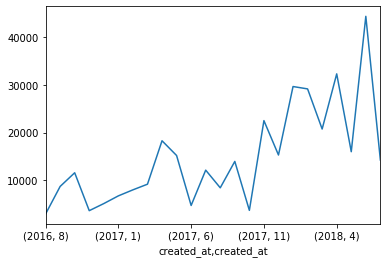

In [4]:
tweets_df.groupby([tweets_df['created_at'].dt.year, tweets_df['created_at'].dt.month]).size().plot()

## Now take a look into their topics (from the list of bag_of_words, try find some words which is really a topic)

In [5]:
import preprocessor as p
tweets_df['clean_tweet']  = tweets_df['clean_tweet'].apply(p.clean)
tweets_df['clean_tweet']  = tweets_df['clean_tweet'].str.lower()
bag_of_words, vectorizer = get_bag_of_words(tweets_df['clean_tweet'],ngram_range=(1,3), min_df=0.0005)
print(vectorizer.get_feature_names())
# 3756 keywords/strings in total

['000', '000 people', '10', '100', '11', '13', '15', '20', '200', '30', '50', '500', 'aaron', 'abc', 'abe', 'ability', 'able', 'abortion', 'abroad', 'absolutely', 'abuse', 'academy', 'accept', 'access', 'accident', 'accidentally', 'according', 'according new', 'account', 'accounts', 'accusations', 'accused', 'accuser', 'accuses', 'aclu', 'across', 'across country', 'act', 'acting', 'action', 'actions', 'active', 'activist', 'activists', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adam', 'add', 'added', 'addiction', 'adding', 'additional', 'address', 'addresses', 'adds', 'admin', 'administration', 'admits', 'admitted', 'ads', 'adult', 'adults', 'advance', 'advantage', 'advice', 'adviser', 'advisers', 'advocates', 'affair', 'affairs', 'affect', 'affected', 'affordable', 'afghan', 'afghanistan', 'afraid', 'africa', 'african', 'african american', 'ag', 'age', 'agencies', 'agency', 'agenda', 'agent', 'agents', 'aggressive', 'ago', 'agree', 'agreed', 'agreement', 'agrees', '

## Some topics I could recogmize:
### 'trump', 'hillary', 'obama', 'house', 'china', 'chinese', 'japan', 'britain', 'brexit', 'india', 'civil war', 'school shooting', 'vladimir', 'supremacist'

In [40]:
keywords = ['trump', 'hillary', 'obama', 'house', 'china', 'chinese', 'japan', 'britain', 'brexit', 'india', \
           'afghan', 'civil war', 'school shooting', 'vladimir', 'supremacist']
for word in keywords:
    print("Number of tweets containing", word, ":", sum(tweets_df['clean_tweet'].str.contains(word)))

Number of tweets containing trump : 68646
Number of tweets containing hillary : 2370
Number of tweets containing obama : 6346
Number of tweets containing house : 12742
Number of tweets containing china : 4886
Number of tweets containing chinese : 1500
Number of tweets containing japan : 1468
Number of tweets containing britain : 877
Number of tweets containing brexit : 715
Number of tweets containing india : 1909
Number of tweets containing afghan : 873
Number of tweets containing civil war : 359
Number of tweets containing school shooting : 1000
Number of tweets containing vladimir : 655
Number of tweets containing supremacist : 408


## Choose some relevent keywords and some specific time interval

In [80]:
tweets_df_topic = tweets_df.loc[(tweets_df['clean_tweet'].str.contains('trump')) | \
                  (tweets_df['clean_tweet'].str.contains('hillary')) | \
                  (tweets_df['clean_tweet'].str.contains('obama'))]
tweets_df_topic = tweets_df_topic.loc[((tweets_df['created_at']) >= '2018-01-01') & \
                                      ((tweets_df['created_at']) <= '2018-12-31')]
tweets_df_topic = tweets_df_topic.reset_index()
tweets_df_topic.shape

(37234, 5)

In [77]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import metrics
def get_binary_NB_model(bag_of_words, df):
    # Training data:
    class1_words = bag_of_words[df['user_name'].isin(right_train_users),:]
    class2_words = bag_of_words[df['user_name'].isin(left_train_users),:]
    train_tweets = np.concatenate((class1_words,class2_words))
    labels = np.concatenate((np.zeros(class1_words.shape[0]),np.ones(class2_words.shape[0])))
    nb = ComplementNB()
    nb.fit(train_tweets, labels)
    # # Performance on training data
    predictions = nb.predict(train_tweets)
    print('Training Accuracy: ' + str(sum(labels==predictions)/len(labels)))
    # Compute the error.
    tn, fp, fn, tp = metrics.confusion_matrix(labels,predictions).ravel()
    print(tn, fp, fn, tp)
    return nb

In [94]:
left_train_users = ['thinkprogress', 'MSNBC', 'thenation']
right_train_users = ['DailySignal', 'cnsnews','foxnewsradio','BreitbartNews', 'DailyCaller']
bag_of_words, vectorizer = get_bag_of_words(tweets_df_topic['clean_tweet'],ngram_range=(1,3), min_df=0.001)
nb_model = get_binary_NB_model(bag_of_words, tweets_df_topic)

Training Accuracy: 0.8259938109973816
1713 345 386 1757


In [95]:
# predictions = nb_model.predict(bag_of_words[tweets_df['user_name'].isin(test_users),:])
# tweets_df['nb_tweet_pred'] = np.NaN
# tweets_df.loc[tweets_df['user_name'].isin(test_users),['nb_tweet_pred']] = predictions
predict_probs = nb_model.predict_proba(bag_of_words)
tweets_df_topic['right_prob'] = predict_probs[:,0]
tweets_df_topic['left_prob'] = predict_probs[:,1]
tweets_df_topic['nb_tweet_pred'] = nb_model.predict(bag_of_words)

## Now with the same naive bayes model, we can see the keywords helping rule out irrelevant tweets and classify better (compared with previous work on all tweets)

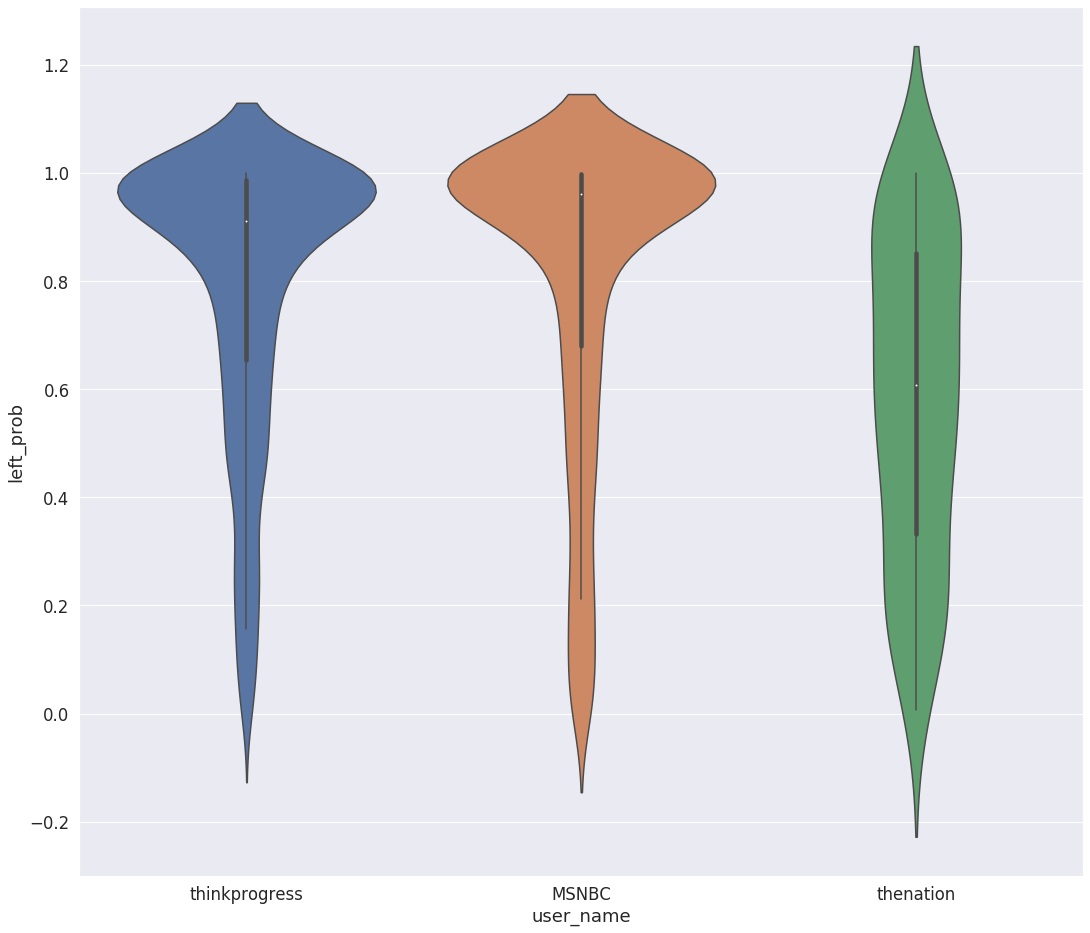

In [97]:
# Make scatter plots for train_left:
plt.figure(figsize=(18, 16))
sns.violinplot(x='user_name', y='left_prob', data=tweets_df_topic.loc[tweets_df_topic['user_name'].isin(left_train_users)])

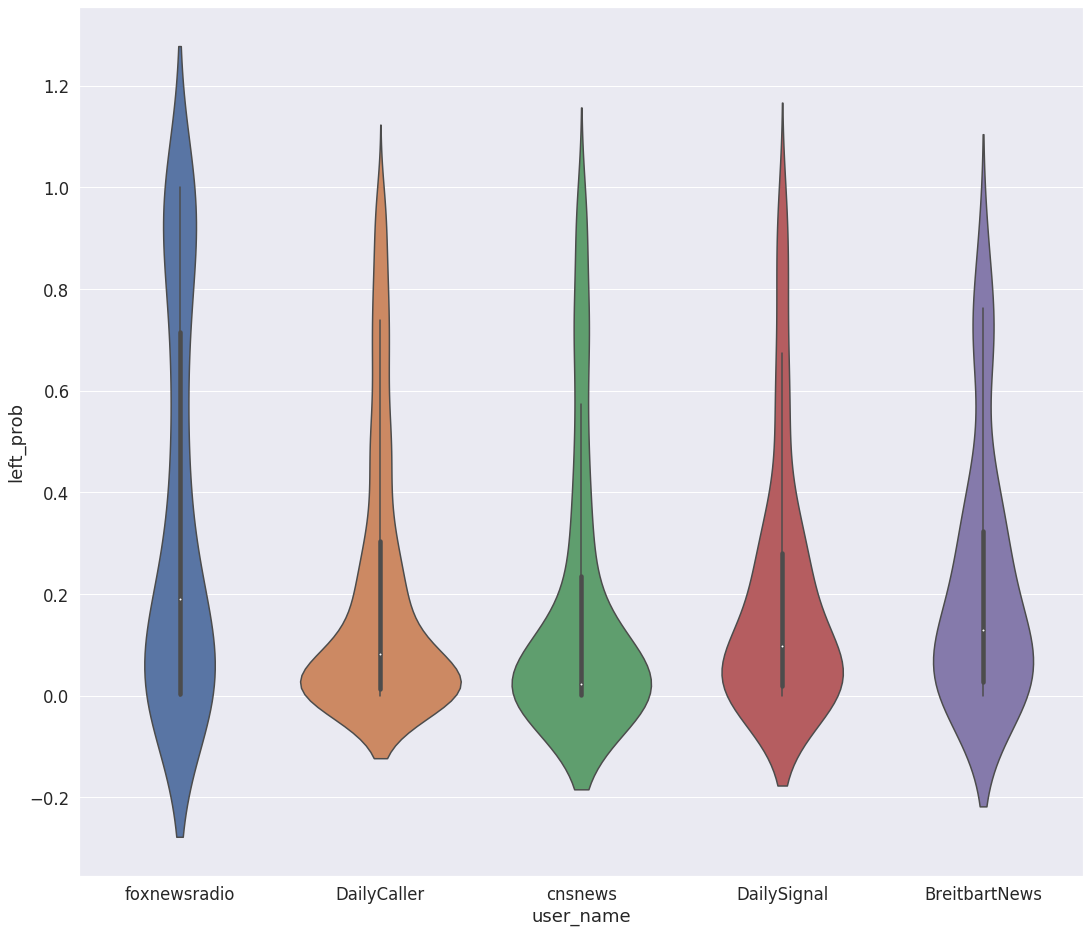

In [103]:
# Make scatter plots for train_right:
plt.figure(figsize=(18, 16))
sns.violinplot(x='user_name', y='left_prob', data=tweets_df_topic.loc[tweets_df_topic['user_name'].isin(right_train_users)])

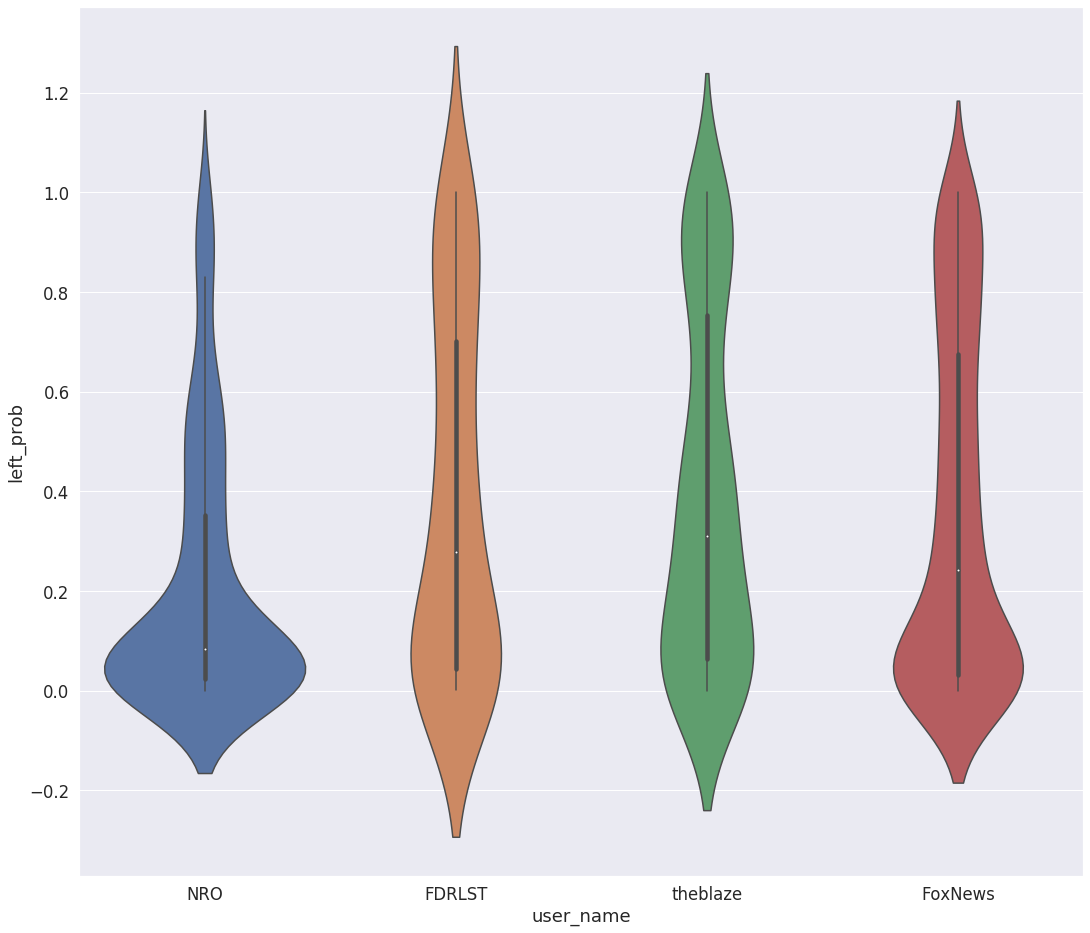

In [106]:
left_test_users = ['cnnbrk','newrepublic', 'TheAtlantic', 'axios', 'BuzzFeed', 'newrepublic', \
                   'thedailybeast', 'CNN', 'MotherJones']
right_test_users = ['FDRLST', 'NRO', 'theblaze', 'FoxNews']

# Make scatter plots for test_right:
plt.figure(figsize=(18, 16))
sns.violinplot(x='user_name', y='left_prob', data=tweets_df_topic.loc[tweets_df_topic['user_name'].isin(right_test_users)])

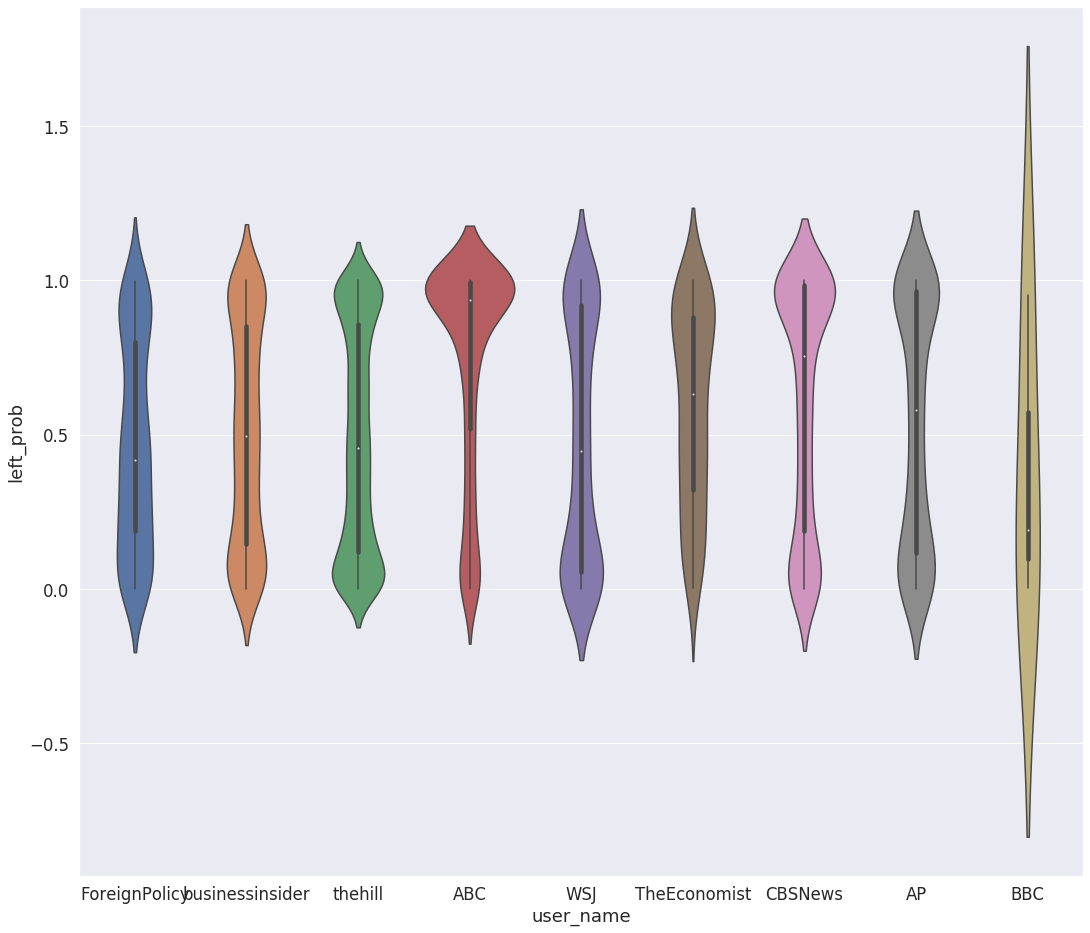

In [100]:
# Make scatter plots for test_neutral:
neutral_test_users = ['BBC', 'businessinsider', 'CBSNews', 'TheEconomist', 'thehill', \
                      'WSJ','Independent','ABC', 'AP', 'ForeignPolicy']

plt.figure(figsize=(18, 16))
sns.violinplot(x='user_name', y='left_prob', data=tweets_df_topic.loc[tweets_df_topic['user_name'].isin(neutral_test_users)])

## The rest of the work is some failed attempt to do linear regression for the left/right coordinate

In [56]:
bag_of_words, vectorizer = get_bag_of_words(tweets_df_topic['clean_tweet'],ngram_range=(1,3), min_df=0.0005)
data = np.zeros([media_df.shape[0], bag_of_words.shape[1]])
for index, row in media_df.iterrows():
    BoW = bag_of_words[tweets_df_topic['user_name'] == row['MediaTwitterAcc'],:]
    
    data[index] = sum(BoW)/len(BOW)
labels = media_df['LeftRightCoordinate'].to_numpy()

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

Mean squared error: 408.53


In [7]:
reg.coef_

array([ 0.01702575, -0.00353617,  0.00586989, ...,  0.00454989,
        0.00101636, -0.00812849])

In [11]:
tweets_df['created_at'].head(10)

0    Sat Nov 26 11:00:10 +0000 2016
1    Sat Nov 26 10:11:27 +0000 2016
2    Sat Nov 26 15:08:55 +0000 2016
3    Sat Nov 26 07:52:34 +0000 2016
4    Sat Nov 26 15:43:39 +0000 2016
5    Sat Nov 26 05:15:06 +0000 2016
6    Sat Nov 26 05:55:04 +0000 2016
7    Sat Nov 26 07:15:03 +0000 2016
8    Sat Nov 26 04:59:05 +0000 2016
9    Sat Nov 26 12:16:47 +0000 2016
Name: created_at, dtype: object

In [4]:
tweets_df.head(1)

,user_name,id,clean_tweet,created_at
0,ABC,802466973086908417,Fidel Castro Dead at 90: Barbara Walters talks...,Sat Nov 26 11:00:10 +0000 2016


In [5]:
from itertools import permutations
list(permutations(['1','2','3']))

[('1', '2', '3'),
 ('1', '3', '2'),
 ('2', '1', '3'),
 ('2', '3', '1'),
 ('3', '1', '2'),
 ('3', '2', '1')]